# Principal Component Analysis

## import library

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [59]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

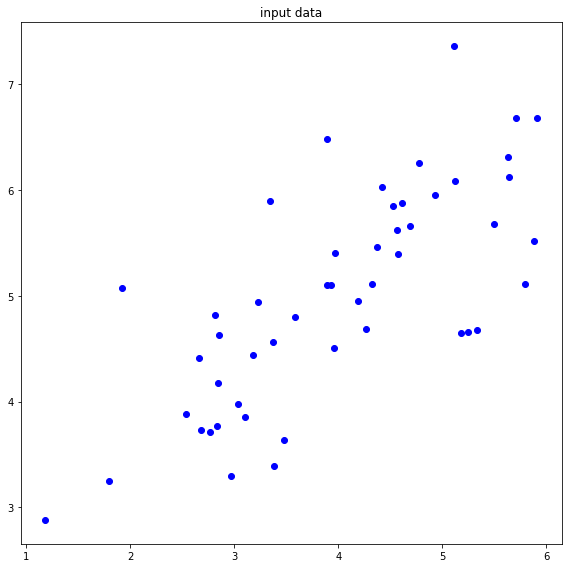

In [60]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [61]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    x = feature[:, 0]
    y = feature[:, 1]
    
    x = (x - np.mean(x)) / np.std(x)
    y = (y - np.mean(y)) / np.std(y)
    
    feature_normalize = np.c_[x, y]

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [62]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [63]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    Sigma = np.cov(feature.T)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [64]:
def compute_eigen(feature):
    h, u = np.linalg.eig(compute_covariance(feature))
    s = h.argsort()
    h = h[s[::-1]]
    u = u[s[::-1]]
    
    return h, u

In [65]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    h, u = compute_eigen(feature)
    
    principal_component_1 = h[0] * u[:, 0]
    principal_component_2 = h[1] * u[:, 1]

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [66]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    n = len(feature)
    projection = np.zeros((n, 2))
    
    norm_square = sum(vector**2)
    
    for i in range(n):
        projection[i] = np.dot(feature[i, :], vector) / norm_square * vector
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection

## compute the principal components and the projection of feature

In [67]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

---

---

## functions for presenting the results

---

---

In [68]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [69]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.plot(x, y, '.', color='blue')
    
    plt.arrow(0, 0, principal_component_1[0], principal_component_1[1], color='red', width = 0.02)
    plt.arrow(0, 0, principal_component_2[0], principal_component_2[1], color='green', width = 0.02)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [70]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    plt.plot(x, y, '.', color = 'blue')
    
    plt.axline((0,0), principal_component_1, color='r')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [71]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.plot(x, y, '.', color = 'blue')
    
    plt.axline((0,0), principal_component_2, color='r')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [72]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.plot(x, y, '.', color = 'blue')
    
    plt.axline((0,0), principal_component_1, color='r')
    
    plt.plot(projection1[:, 0], projection1[:, 1], '.', color = 'green')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [73]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.plot(x, y, '.', color = 'blue')
    
    plt.axline((0,0), principal_component_2, color='r')
    
    plt.plot(projection2[:, 0], projection2[:, 1], '.', color = 'green')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [74]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.plot(x, y, '.', color = 'blue')
    
    plt.axline((0,0), principal_component_1, color='r')
    
    plt.plot(projection1[:, 0], projection1[:, 1], '.', color = 'green')
    
    for i in range(len(feature)):
        line_x = x[i], projection1[i, 0]
        line_y = y[i], projection1[i, 1]
        plt. plot(line_x, line_y, '-', color= 'gray')
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [75]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    plt.plot(x, y, '.', color = 'blue')
    
    plt.axline((0,0), principal_component_2, color='r')
    
    plt.plot(projection2[:, 0], projection2[:, 1], '.', color = 'green')
    
    for i in range(len(feature)):
        line_x = x[i], projection2[i, 0]
        line_y = y[i], projection2[i, 1]
        plt. plot(line_x, line_y, '-', color= 'gray')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


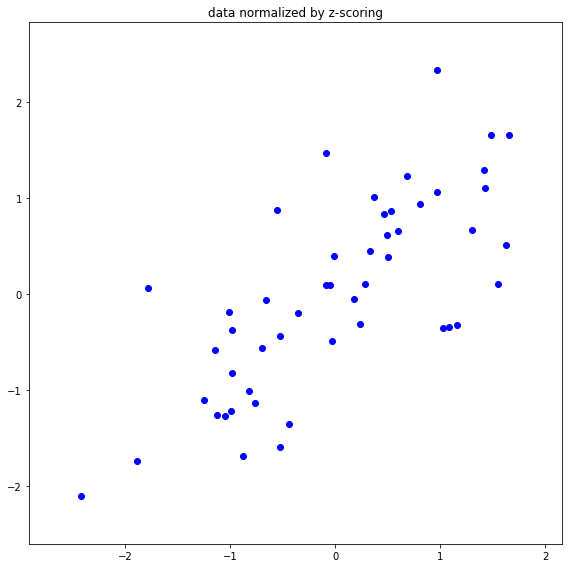

**************************************************
## [RESULT 02]
**************************************************


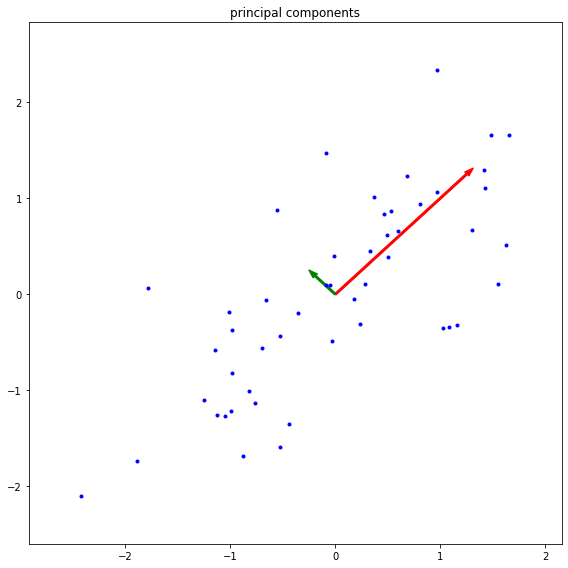

**************************************************
## [RESULT 03]
**************************************************


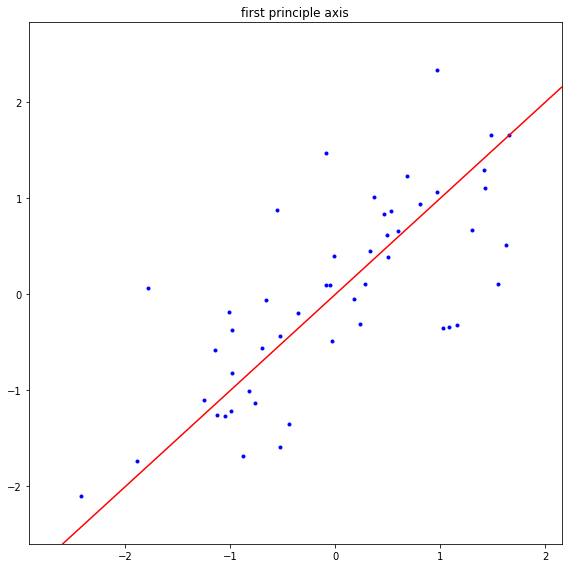

**************************************************
## [RESULT 04]
**************************************************


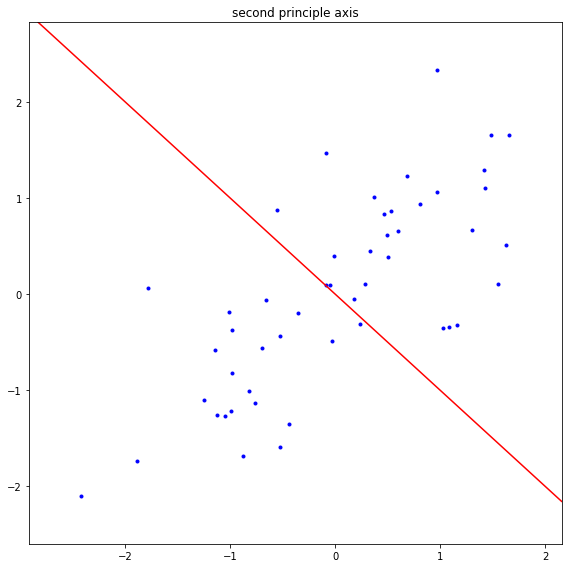

**************************************************
## [RESULT 05]
**************************************************


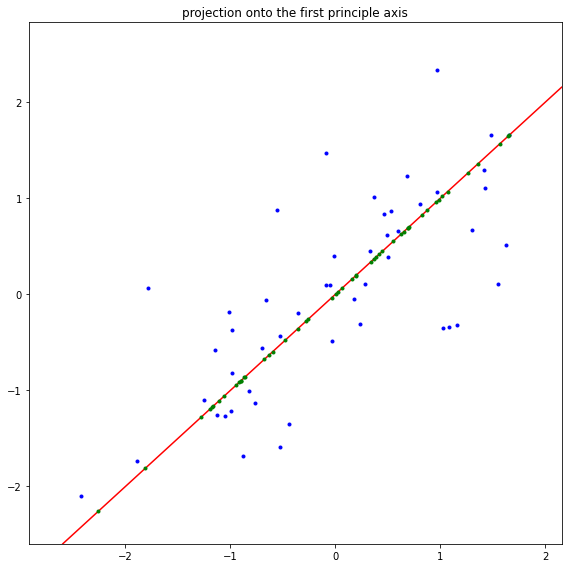

**************************************************
## [RESULT 06]
**************************************************


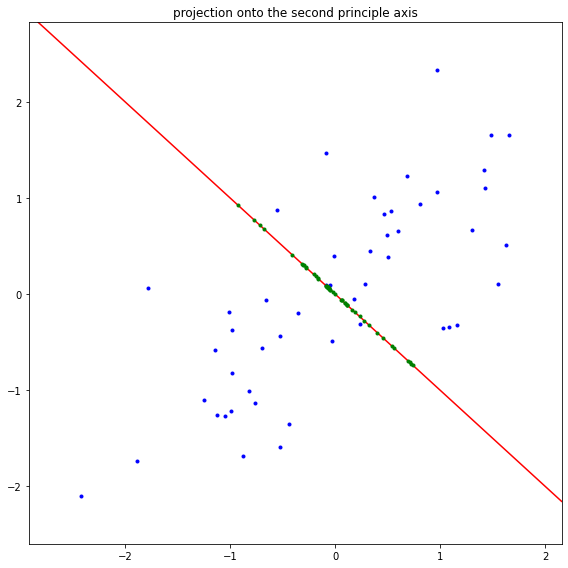

**************************************************
## [RESULT 07]
**************************************************


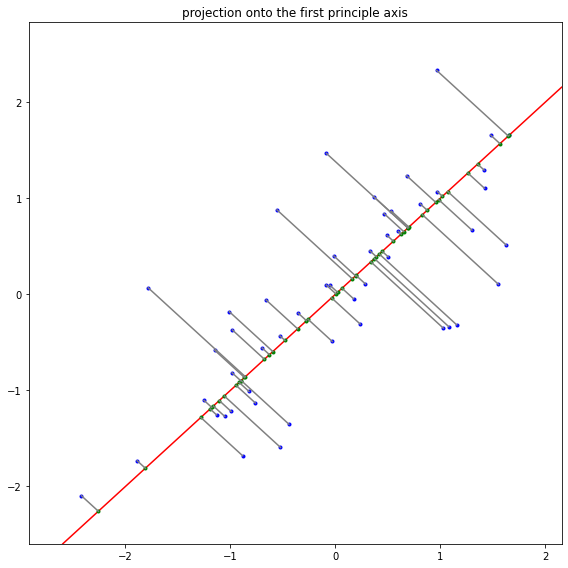

**************************************************
## [RESULT 08]
**************************************************


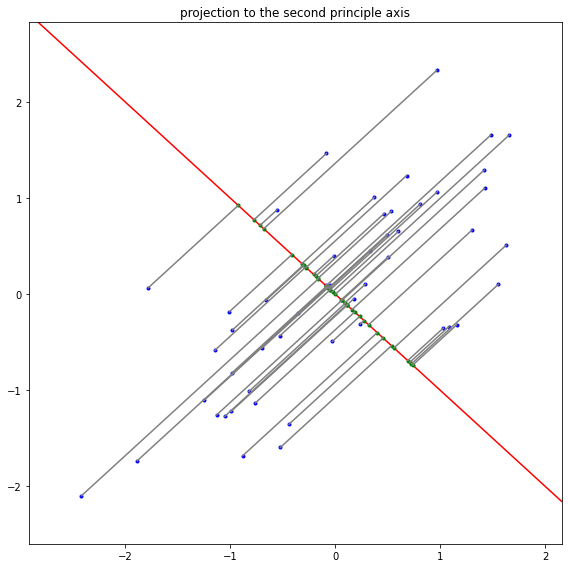

In [76]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)